<a href="https://colab.research.google.com/github/IsuruMahakumara/microsoft-ai-ml-engineering/blob/main/Implementation_of_deep_learning_techniques_GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Define Generator and Discriminator

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the generator model
def build_generator():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(100,)),
        layers.Dense(784, activation='sigmoid')  # Output: 28x28 flattened image
    ])
    return model

# Define the discriminator model
def build_discriminator():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(784,)),  # Input: Flattened 28x28 image
        layers.Dense(1, activation='sigmoid')  # Output: Probability (real or fake)
    ])
    return model

#### Training GAN

In [3]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Load and preprocess dataset (MNIST for example)
(X_train, _), (_, _) = mnist.load_data()

# Normalize images to [-1, 1] and flatten to (784,) for the discriminator input
X_train = (X_train.astype(np.float32) - 127.5) / 127.5  # Normalize to range [-1, 1]
X_train = X_train.reshape(-1, 784)  # Flatten 28x28 images to vectors of size 784

# Check the shape of the dataset
print(f"X_train shape: {X_train.shape}")  # Should print: (60000, 784)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (60000, 784)


In [4]:
# Build the models
generator = build_generator()
discriminator = build_discriminator()

# Compile the discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create GAN model: stack generator and discriminator
gan = models.Sequential([generator, discriminator])
discriminator.trainable = False  # Freeze the discriminator when training the GAN

gan.compile(optimizer='adam', loss='binary_crossentropy')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 0, Discriminator Loss: 5.6253814697265625, Generator Loss: 0.0004637321108020842


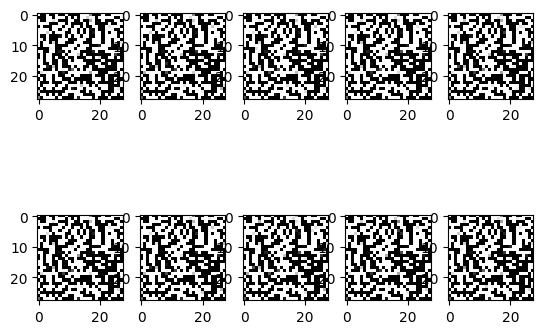

Epoch 1000, Discriminator Loss: 5.665516376495361, Generator Loss: 0.00043495616409927607


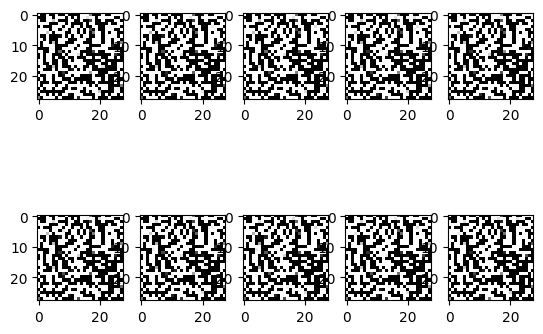

Epoch 2000, Discriminator Loss: 5.70177698135376, Generator Loss: 0.00040957905002869666


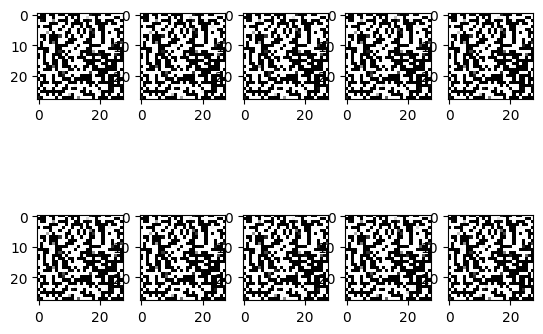

Epoch 3000, Discriminator Loss: 5.73449182510376, Generator Loss: 0.0003870283253490925


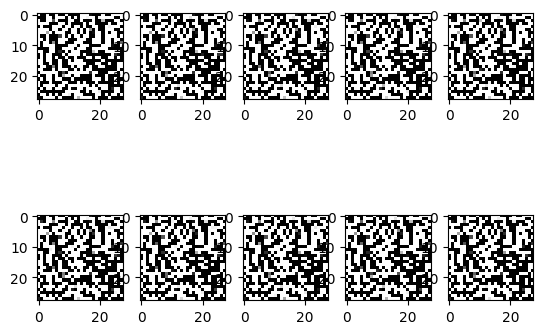

Epoch 4000, Discriminator Loss: 5.764095306396484, Generator Loss: 0.0003668382705654949


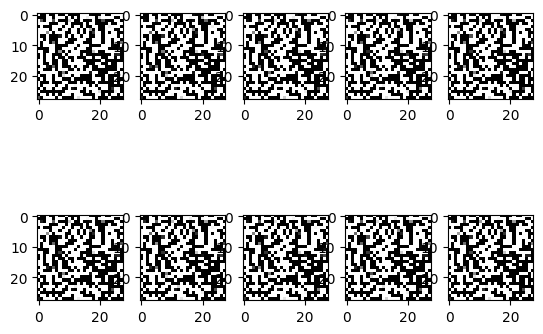

Epoch 5000, Discriminator Loss: 5.790901184082031, Generator Loss: 0.0003486739005893469


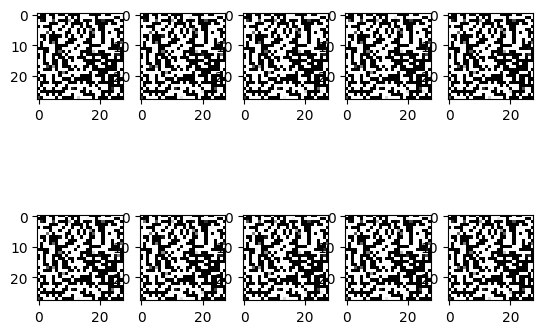

Epoch 6000, Discriminator Loss: 5.815472602844238, Generator Loss: 0.0003322450502309948


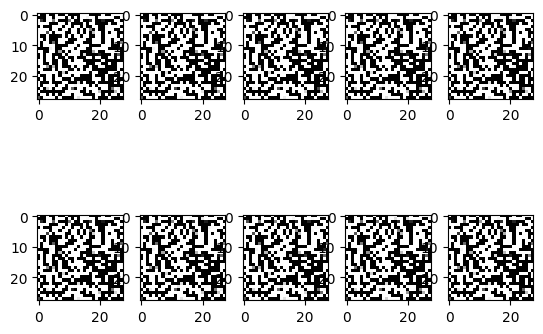

Epoch 7000, Discriminator Loss: 5.837865829467773, Generator Loss: 0.0003173142613377422


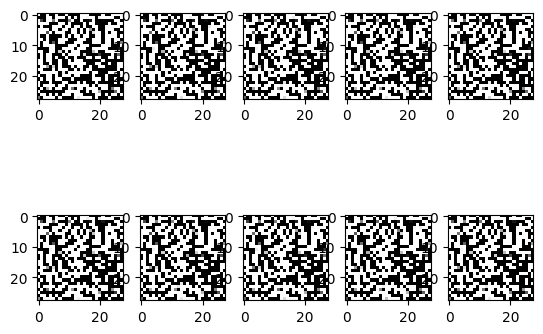

Epoch 8000, Discriminator Loss: 5.858506679534912, Generator Loss: 0.0003036856069229543


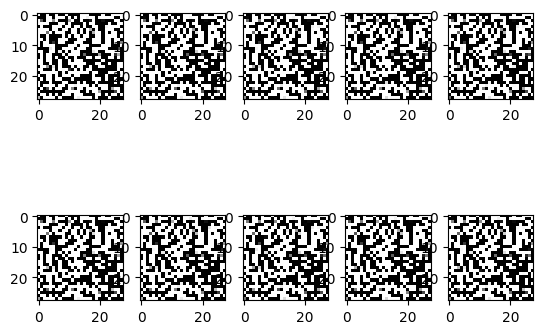

Epoch 9000, Discriminator Loss: 5.877500534057617, Generator Loss: 0.0002911958727054298


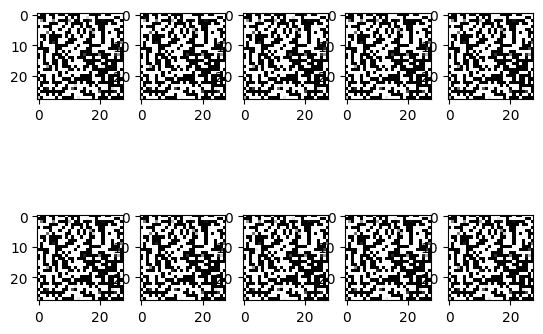

In [13]:
from os import devnull
import matplotlib.pyplot as plt
from contextlib import redirect_stdout

def suppress_stdout():
    """Temporarily suppresses all stdout print statements."""
    return redirect_stdout(open(devnull, 'w'))

# Training GAN
epochs = 10000
batch_size = 64
half_batch = batch_size // 2

for epoch in range(epochs):
    # Real images
    idx = np.random.randint(0, X_train.shape[0], half_batch)
    real_images = X_train[idx]
    real_labels = np.ones((half_batch, 1))

    # Fake images
    noise = np.random.normal(0, 1, (half_batch, 100))
    fake_images = generator.predict(noise, verbose=0)
    fake_labels = np.zeros((half_batch, 1))

    # Train the discriminator
    with suppress_stdout():
      d_loss_real = discriminator.train_on_batch(real_images, real_labels)
      d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)

    # Train the generator (via GAN model)
    noise = np.random.normal(0, 1, (batch_size, 100))
    gan_labels = np.ones((batch_size, 1))  # Try to fool the discriminator
    with suppress_stdout():
      g_loss = gan.train_on_batch(noise, gan_labels)

    # Every 1000 epochs, print losses and visualize generated images
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Discriminator Loss: {d_loss_real[0]}, Generator Loss: {g_loss}")
        # Generate and display images
        generated_images = generator.predict(np.random.normal(0, 1, (10, 100)), verbose=0)
        for i in range(10):
            plt.subplot(2, 5, i+1)
            plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
        plt.show()